In [2]:
import numpy as np
import tensorflow as tf
import string
import pandas as pd
import gensim
from datasets import Dataset
import spacy
import core.model_utils as model_utils
import core.constants as constants
import matplotlib.pyplot as plt
import os

In [3]:
spacy_model = spacy.load("pl_core_news_sm")

# Stop words
stop_words = spacy_model.Defaults.stop_words.copy()
stop_words.remove("nie")

# Punctuation
punctuations = string.punctuation


# Tokenizer
def spacy_tokenizer(sentence):
    doc = spacy_model(sentence)

    # Lemmatizing each token and converting each token into lowercase
    my_tokens = [ word.lemma_.lower().strip() for word in doc ]

    # Removing stop words and punctuation
    my_tokens = [ word for word in my_tokens if word not in stop_words and word not in punctuations ]
    return my_tokens


df = pd.read_json('./../data/polish_translated/emotions/assignments_dataset.json')

In [8]:
ordered_class_labels = {
    "joy": 0,
    "love": 1,
    "surprise": 2,
    "sadness": 3,
    "anger": 4,
    "fear": 5,
}

df = df.replace({"emotion": ordered_class_labels})

In [9]:
df

,comment,emotion
0,Jak palion zrobi piosenkę to wiadomo co będzie...,0
1,"Wiem, że palion może tego nigdy nie zobaczyć, ...",0
2,Był kiedyś taki serial : Kasia i Tomek i wedłu...,0
3,Mamy właśnie przykład jak powinna wyglądać pra...,0
4,Siemka WK teraz moja kolej na nagrodę 😁 pozdra...,0
...,...,...
1327,Uwielbiam twoje firmy zabieram się za oglądani...,0
1328,"Dla mnie ""Film o pszczołach"" był genialny. Zar...",3
1329,Zawsze o 14.00 odrazu każda sobota jest lepsza...,0
1330,Zawsze oglądane do końca! La Budda <3,1


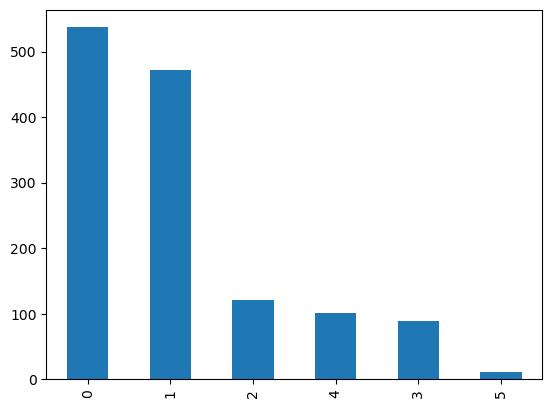

In [10]:
data = df["emotion"]
data.value_counts().plot.bar()
plt.show()

In [14]:
emotions = [0, 1]
rslt_df = df[df['emotion'].isin(emotions)]
rslt_df

,comment,emotion
0,Jak palion zrobi piosenkę to wiadomo co będzie...,0
1,"Wiem, że palion może tego nigdy nie zobaczyć, ...",0
2,Był kiedyś taki serial : Kasia i Tomek i wedłu...,0
3,Mamy właśnie przykład jak powinna wyglądać pra...,0
4,Siemka WK teraz moja kolej na nagrodę 😁 pozdra...,0
...,...,...
1325,"Cały występ klasa, dawno się tak nie uśmiałem,...",0
1327,Uwielbiam twoje firmy zabieram się za oglądani...,0
1329,Zawsze o 14.00 odrazu każda sobota jest lepsza...,0
1330,Zawsze oglądane do końca! La Budda <3,1


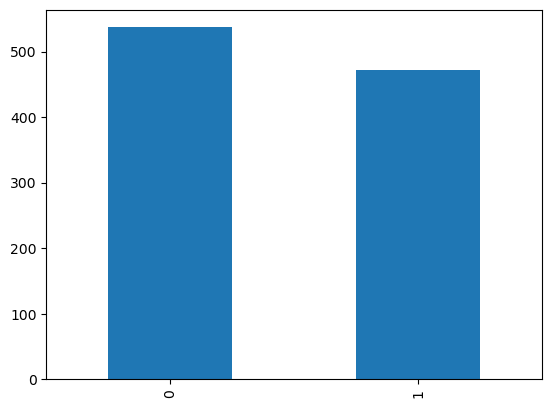

In [16]:
data = rslt_df["emotion"]
data.value_counts().plot.bar()
plt.show()

In [17]:
rslt_df['tokens'] = rslt_df['comment'].apply(spacy_tokenizer)
rslt_df['joined_tokens'] = rslt_df['comment'].apply(lambda tokens: ' '.join(tokens))
rslt_df.to_json('./../data/polish_translated/emotions/assignments_dataset_pl_with_tokens_0_1.json')

C:\Users\Artur\AppData\Local\Temp\ipykernel_11180\3783827038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df['tokens'] = rslt_df['comment'].apply(spacy_tokenizer)
C:\Users\Artur\AppData\Local\Temp\ipykernel_11180\3783827038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df['joined_tokens'] = rslt_df['comment'].apply(lambda tokens: ' '.join(tokens))


In [18]:
tokenized_sentences_df = pd.read_json(
    './../data/polish_translated/emotions/assignments_dataset_pl_with_tokens_0_1.json')
tokenized_sentences_df

,comment,emotion,tokens,joined_tokens
0,Jak palion zrobi piosenkę to wiadomo co będzie...,0,"[palion, zrobić, piosenka, wiadomo, kanał, poz...",J a k p a l i o n z r o b i p i o s e n ...
1,"Wiem, że palion może tego nigdy nie zobaczyć, ...",0,"[wiedzieć, palion, móc, nie, zobaczyć, zrobić,...","W i e m , ż e p a l i o n m o ż e t e ..."
2,Był kiedyś taki serial : Kasia i Tomek i wedłu...,0,"[kiedyś, serial, kasia, tomek, jesteście, nowo...",B y ł k i e d y ś t a k i s e r i a l ...
3,Mamy właśnie przykład jak powinna wyglądać pra...,0,"[mieć, przykład, wyglądać, prawdziwy, konferen...",M a m y w ł a ś n i e p r z y k ł a d j ...
4,Siemka WK teraz moja kolej na nagrodę 😁 pozdra...,0,"[siemka, wk, kolej, nagroda, 😁a, pozdrawiać, 💪]",S i e m k a W K t e r a z m o j a k o ...
...,...,...,...,...
1325,"Cały występ klasa, dawno się tak nie uśmiałem,...",0,"[występ, klasa, dawno, nie, uśmieć być, zjadć ...","C a ł y w y s t ę p k l a s a , d a w n ..."
1327,Uwielbiam twoje firmy zabieram się za oglądani...,0,"[uwielbiam, firma, zabierać, oglądać, pozdrawi...",U w i e l b i a m t w o j e f i r m y z ...
1329,Zawsze o 14.00 odrazu każda sobota jest lepsza...,0,"[14, 00, odraz, sobota, dobry, dzięki, kamil, ...",Z a w s z e o 1 4 . 0 0 o d r a z u k ...
1330,Zawsze oglądane do końca! La Budda <3,1,"[oglądać, koniec, la, budda, <3]",Z a w s z e o g l ą d a n e d o k o ń c ...


In [19]:
full_dataset = Dataset.from_pandas(tokenized_sentences_df).remove_columns("__index_level_0__")
full_dataset

Dataset({
    features: ['comment', 'emotion', 'tokens', 'joined_tokens'],
    num_rows: 1009
})

In [20]:
# Train set: 80%, Validation set: 10%, Test set: 10%
train_dataset, val_dataset, test_dataset = model_utils.split_train_val_test(
    full_dataset,
    train_size=0.8,
    test_size_of_val_test_batch=0.5,
    shuffle=True,
    seed=42)

In [21]:
# Word2Vec
tokenized_sentences = train_dataset['tokens']
w2v_model = gensim.models.Word2Vec(sentences=tokenized_sentences, vector_size=100, window=6, min_count=1)
w2v_model.train(tokenized_sentences, epochs=10, total_examples=len(tokenized_sentences))

(83812, 91910)

In [22]:
def tokens_to_vector(tokens, max_tokens=50):
    vector_size = w2v_model.vector_size
    wv_res = np.zeros((vector_size, max_tokens))
    for index, word in enumerate(tokens):
        if word in w2v_model.wv and index < max_tokens:
            wv_res.T[index] = w2v_model.wv[word]
    return wv_res.T

In [23]:
def tokenize_for_word2vec(sample):
    sample['embeddings'] = [tokens_to_vector(tokens) for tokens in sample['tokens']]
    return sample


train_dataset = train_dataset.map(tokenize_for_word2vec, batched=True)
val_dataset = val_dataset.map(tokenize_for_word2vec, batched=True)
test_dataset = test_dataset.map(tokenize_for_word2vec, batched=True)

Map:   0%|          | 0/807 [00:00<?, ? examples/s]

Map:   0%|          | 0/101 [00:00<?, ? examples/s]

Map:   0%|          | 0/101 [00:00<?, ? examples/s]

In [25]:
columns = ["embeddings"]
label_cols = ["emotion"]
batch_size = 16

tf_train_dataset = model_utils.convert_to_tf_dataset(train_dataset, columns, label_cols, None, batch_size)
tf_val_dataset = model_utils.convert_to_tf_dataset(val_dataset, columns, label_cols, None, batch_size)
tf_test_dataset = model_utils.convert_to_tf_dataset(test_dataset, columns, label_cols, None, batch_size)

In [31]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(6, activation='sigmoid'))

In [32]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])

In [33]:
# Model parameters
training_number = 1
model_name = 'emotions_pl_word2vec_binary_thesis'
training_name = f"training_{training_number}"
figures_dir = f"./../documentation/models/{model_name}/figures"
checkpoint_filename_template = "cp-{epoch:04d}.ckpt"
checkpoints_dir = os.path.join(constants.TRAINING_CHECKPOINTS_PATH, model_name, training_name)
checkpoint_path = os.path.join(checkpoints_dir, checkpoint_filename_template)

In [34]:
# Callbacks
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, verbose=1, save_weights_only=True)
early_stop_cb = tf.keras.callbacks.EarlyStopping(patience=3)
callbacks = [checkpoint_cb, early_stop_cb]

In [35]:
history = model.fit(tf_train_dataset, validation_data=tf_val_dataset, epochs=20,
                    callbacks=[checkpoint_cb, early_stop_cb])

Epoch 1/20
49/51 [===========================>..] - ETA: 0s - loss: 1.0173 - accuracy: 0.5089
Epoch 1: saving model to ./../training_checkpoints\emotions_pl_word2vec_binary_thesis\training_1\cp-0001.ckpt
51/51 [==============================] - 2s 27ms/step - loss: 1.0090 - accuracy: 0.5081 - val_loss: 0.7477 - val_accuracy: 0.4950
Epoch 2/20
49/51 [===========================>..] - ETA: 0s - loss: 0.7344 - accuracy: 0.5395
Epoch 2: saving model to ./../training_checkpoints\emotions_pl_word2vec_binary_thesis\training_1\cp-0002.ckpt
51/51 [==============================] - 1s 20ms/step - loss: 0.7332 - accuracy: 0.5390 - val_loss: 0.7244 - val_accuracy: 0.5248
Epoch 3/20
47/51 [==========================>...] - ETA: 0s - loss: 0.7080 - accuracy: 0.5585
Epoch 3: saving model to ./../training_checkpoints\emotions_pl_word2vec_binary_thesis\training_1\cp-0003.ckpt
51/51 [==============================] - 1s 22ms/step - loss: 0.7081 - accuracy: 0.5564 - val_loss: 0.7083 - val_accuracy: 0.534

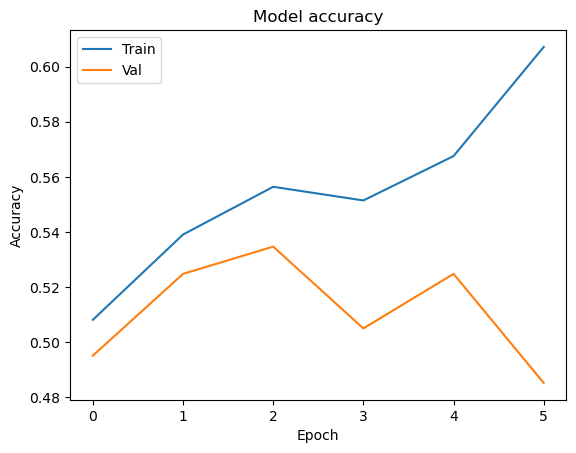

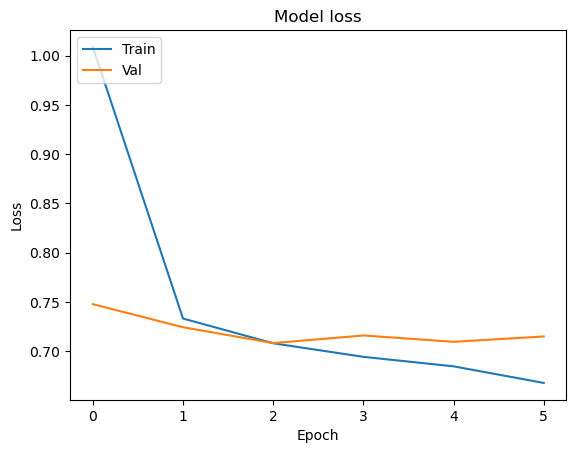

In [36]:
model_utils.plot_and_save_fig_from_history(history,
                                           attributes=['accuracy', 'val_accuracy'],
                                           title='Model accuracy',
                                           y_label='Accuracy',
                                           x_label='Epoch',
                                           legend_descriptors=['Train', 'Val'],
                                           figure_dir_path=figures_dir,
                                           figure_filename=f"{training_name}_accuracy.png")

model_utils.plot_and_save_fig_from_history(history,
                                           attributes=['loss', 'val_loss'],
                                           title='Model loss',
                                           y_label='Loss',
                                           x_label='Epoch',
                                           legend_descriptors=['Train', 'Val'],
                                           figure_dir_path=figures_dir,
                                           figure_filename=f"{training_name}_loss.png")

In [37]:
best_model = model_utils.get_best_model_from_checkpoints(model, history,
                                                         checkpoints_dir=checkpoints_dir,
                                                         checkpoint_filename_template=checkpoint_filename_template)

In [38]:
model_utils.save_model(best_model, model_name=model_name, training_number=training_number, saved_models_dir=constants.SAVED_MODEL_LOCATION, default_model_version=constants.DEFAULT_MODEL_VERSION)

INFO:tensorflow:Assets written to: ./../trained_models\emotions_pl_word2vec_binary_thesis_1\1\assets


In [39]:
w2v_model.save(f"./word2vec/{model_name}_{training_number}.model")

In [40]:
# Evaluation
best_model.evaluate(tf_test_dataset, batch_size=batch_size)

7/7 [==============================] - 0s 13ms/step - loss: 0.7261 - accuracy: 0.4455


[0.7261130213737488, 0.4455445408821106]

In [41]:
class_preds = model_utils.get_class_preds(best_model, tf_test_dataset, model_returns_logits=False)

7/7 [==============================] - 0s 13ms/step


In [43]:
precision, recall, f1 = model_utils.get_classification_evaluation_metrics(
    class_actual=test_dataset['emotion'],
    class_preds=class_preds,
    average='micro'
)

print(f"Precision score: ", precision)
print(f"Recall score: ", recall)
print(f"F1 score: ", f1)

Precision score:  0.44554455445544555
Recall score:  0.44554455445544555
F1 score:  0.44554455445544555


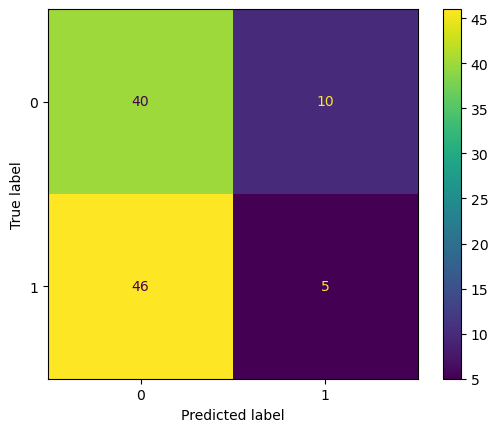

In [45]:
model_utils.plot_and_save_conf_matrix(class_actual=test_dataset['emotion'],
                                      class_preds=class_preds,
                                      figure_dir_path=figures_dir,
                                      figure_filename=f"{training_name}_confmatrix.png")

In [47]:
model_utils.print_incorrectly_predicted_texts(texts=test_dataset['comment'],
                                              class_actual=test_dataset['emotion'],
                                              class_preds=class_preds)


            BAD PREDICTION:
            - INDEX: 1
            - TEXT: Dojebane jak każdy Wasz kawałek ! Panowie czekam na koncert w Białymstoku, pozdro ✌🏻
            - PREDICTED VALUE: 0
            - CORRECT VALUE: 1
            

            BAD PREDICTION:
            - INDEX: 2
            - TEXT: Na uwagę zasługuje fakt ze Sanah jako jedna z najpopularniejszych artystów w Polsce pięknie promuje grę wśród publiczności która być może nie miała okazji mieć styczności z tym arcydziełem - mowa o Wiedzminie rzecz jasna. Moi drodzy każdy kto docenia twórczość Sanah doceni również to jak CDPR opowiedział historie Geralta. Jest w niej wszystko to za co kochamy ta artystkę, wrażliwość, pięknie opowiedziana historia, momenty wzruszenia i śmiechu do łez.
            - PREDICTED VALUE: 1
            - CORRECT VALUE: 0
            

            BAD PREDICTION:
            - INDEX: 3
            - TEXT: Mistrz! Idealne przed snem po calym dniu 👌
            - PREDICTED VALUE: 0
            - 

In [51]:
test_df = pd.DataFrame(
    list(zip(test_dataset['comment'], test_dataset['emotion'], class_preds)),
    columns=['comment', 'emotion', 'prediction'])
test_df

,comment,emotion,prediction
0,"solidny imprezowy numer, nie ma się do czego p...",0,0
1,Dojebane jak każdy Wasz kawałek ! Panowie czek...,1,0
2,Na uwagę zasługuje fakt ze Sanah jako jedna z ...,0,1
3,Mistrz! Idealne przed snem po calym dniu 👌,1,0
4,"Miszczostwo świata, pełen szacunek za tekst 😉",1,0
...,...,...,...
96,Witaj tato ❤ Zdrowia dla Waszej trójki. Cudown...,0,0
97,Oboję musicie iść na TOP MODEL ❤❤❤💖💖💖,1,0
98,Dlatych co nie chcą czekać 5 lat mają taki kol...,0,0
99,Jak dla mnie najlepszy kawałek na tej płycie 🤯,1,0


In [52]:
def map_token_counts(row):
    return len(row['comment'].split())

def map_count_belonging(row, divider):
    int_division_result = int(row['token_count'] / divider) + 1
    lower_boundary = divider * int_division_result - divider
    upper_boundary = divider * int_division_result - 1
    return f"{lower_boundary}-{upper_boundary}"

def map_correctly_predicted(row):
    return int(row['emotion'] == row['prediction'])


test_df['token_count'] = test_df.apply(lambda row: map_token_counts(row), axis=1)
test_df['count_belonging'] = test_df.apply(lambda row: map_count_belonging(row, divider=6), axis=1)
test_df['correctly_predicted'] = test_df.apply(lambda row: map_correctly_predicted(row), axis=1)
test_df

,comment,emotion,prediction,token_count,count_belonging,correctly_predicted
0,"solidny imprezowy numer, nie ma się do czego p...",0,0,10,6-11,1
1,Dojebane jak każdy Wasz kawałek ! Panowie czek...,1,0,14,12-17,0
2,Na uwagę zasługuje fakt ze Sanah jako jedna z ...,0,1,70,66-71,0
3,Mistrz! Idealne przed snem po calym dniu 👌,1,0,8,6-11,0
4,"Miszczostwo świata, pełen szacunek za tekst 😉",1,0,7,6-11,0
...,...,...,...,...,...,...
96,Witaj tato ❤ Zdrowia dla Waszej trójki. Cudown...,0,0,10,6-11,1
97,Oboję musicie iść na TOP MODEL ❤❤❤💖💖💖,1,0,7,6-11,0
98,Dlatych co nie chcą czekać 5 lat mają taki kol...,0,0,14,12-17,1
99,Jak dla mnie najlepszy kawałek na tej płycie 🤯,1,0,9,6-11,0


In [53]:
test_df = test_df.drop(test_df[test_df.token_count > 41].index)

In [54]:
test_df = test_df.sort_values(by=['token_count']).reset_index(drop=True)

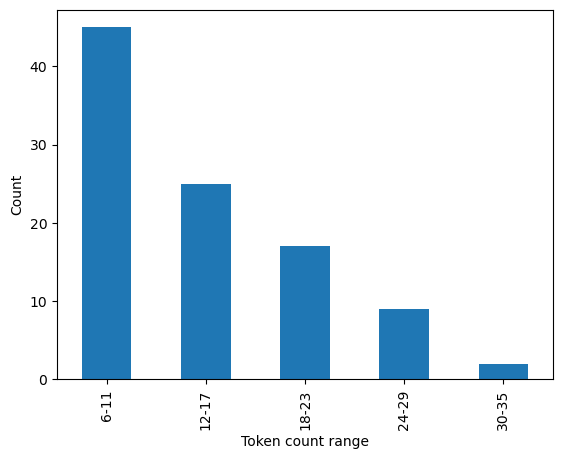

In [55]:
data = test_df['count_belonging']
data.value_counts(sort=False).plot.bar()
plt.xlabel('Token count range')
plt.ylabel('Count')
plt.savefig(os.path.join(figures_dir, f'{training_name}_counts_per_range.png'))
plt.show()

In [56]:
range_to_valid_predictions_count_dict = {'0-5': 0, '6-11': 0, '12-17': 0, '18-23': 0, '24-29': 0, '30-35': 0, '36-41': 0}
range_to_element_count_dict = {'0-5': 0, '6-11': 0, '12-17': 0, '18-23': 0, '24-29': 0, '30-35': 0, '36-41': 0}
range_to_pred_accuracy_dict = {'0-5': 0., '6-11': 0., '12-17': 0., '18-23': 0., '24-29': 0., '30-35': 0., '36-41': 0.}

In [57]:
for _, row in test_df.iterrows():
    count_belonging = row['count_belonging']

    range_to_element_count_dict[count_belonging] = range_to_element_count_dict[count_belonging] + 1

    if row['correctly_predicted']:
        range_to_valid_predictions_count_dict[count_belonging] = range_to_valid_predictions_count_dict[count_belonging] + 1

for key in range_to_pred_accuracy_dict.keys():
    range_to_pred_accuracy_dict[key] = range_to_valid_predictions_count_dict[key] / range_to_element_count_dict[key]

print("Correct predictions count: ", range_to_valid_predictions_count_dict)
print("Element count: ", range_to_element_count_dict)
print("Accuracies: ", range_to_pred_accuracy_dict)

ZeroDivisionError: division by zero

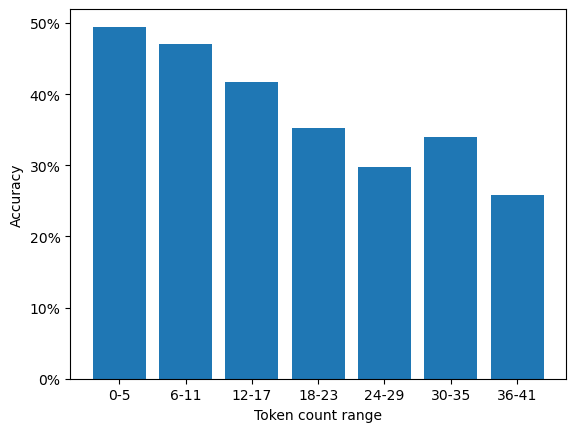

In [ ]:
import matplotlib.ticker as mtick

plt.bar(['0-5', '6-11', '12-17', '18-23', '24-29', '30-35', '36-41'], [val for val in range_to_pred_accuracy_dict.values()])
plt.xlabel('Token count range')
plt.ylabel('Accuracy')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.savefig(os.path.join(figures_dir, f'{training_name}_accuracies_per_range.png'))
plt.show()